In [1]:
import yolov5
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

c:\Users\m.mikowski\Anaconda3\envs\env1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load pretrained model
model = yolov5.load('yolov5s.pt')

YOLOv5  2023-3-28 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA T600 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


In [6]:
### Model structure
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
           

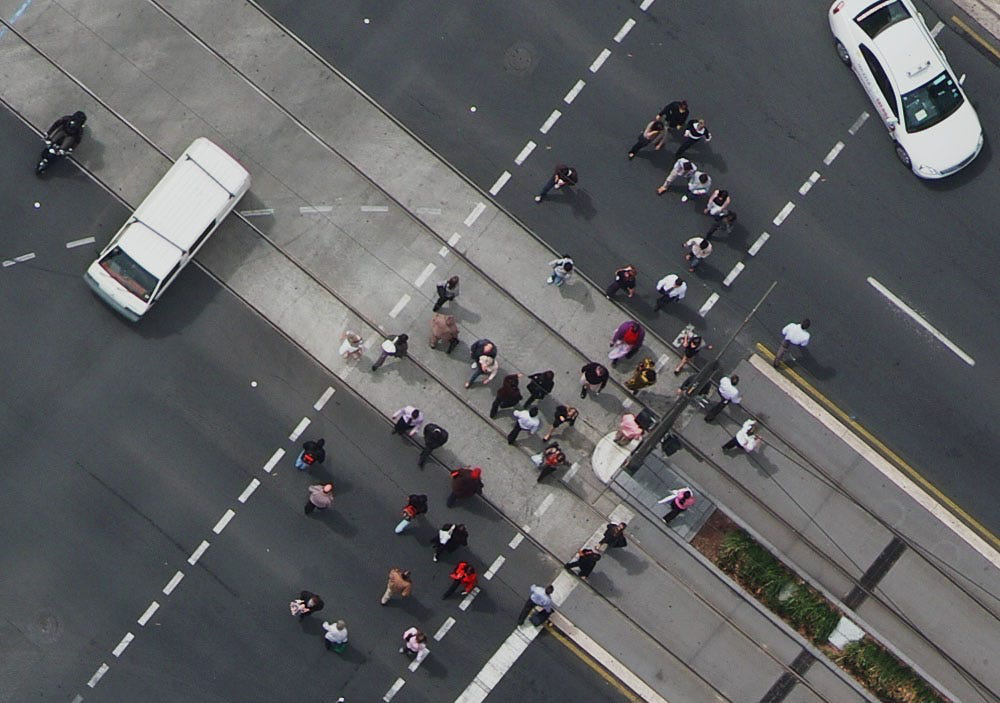

In [3]:
from PIL import Image

img = Image.open("traffic.jpg")
img

In [4]:
results = model(img)
results.print()

image 1/1: 703x1000 9 persons, 1 car, 1 truck
Speed: 18.0ms pre-process, 142.5ms inference, 13.8ms NMS per image at shape (1, 3, 480, 640)


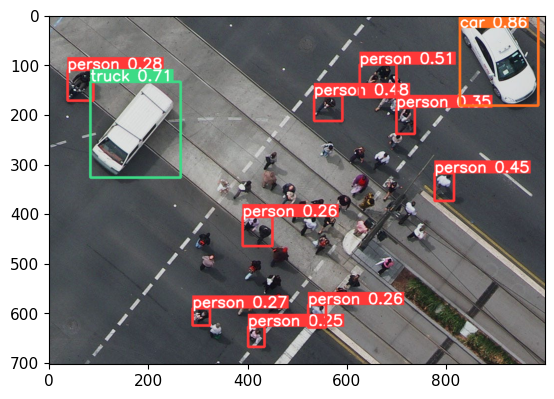

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
### Turn on your webcam to real time object detection

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    #Make detections
    results = model(frame)

    cv2.imshow('Webcam object detector', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [9]:
### and from video file

cap = cv2.VideoCapture('00067cfb-f1b91e3c.mov')
while cap.isOpened():
    ret, frame = cap.read()

    #Make detections
    results = model(frame)

    cv2.imshow('Webcam object detector', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()